# Python Session 4: Introduction to Neural Networks

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader


In [ ]:
# Load MNIST data
import sklearn.datasets
mnist = sklearn.datasets.fetch_openml('mnist_784', data_home="mnist_784")

In [ ]:
x_train = torch.tensor(np.array(mnist.data[:60000]), dtype=torch.float)/255
y_train = torch.tensor([int(x) for x in mnist.target[:60000]])
x_test = torch.tensor(np.array(mnist.data[60000:]), dtype=torch.float)/255
y_test = torch.tensor([int(x) for x in mnist.target[60000:]])
print(x_train.shape, y_train.shape)

torch.Size([60000, 784]) torch.Size([60000])


In [ ]:
train_data = TensorDataset(x_train, y_train)
trainloader= DataLoader(dataset = train_data, batch_size=32, shuffle=True)

test_data = TensorDataset(x_test, y_test)
testloader= DataLoader(dataset = test_data, batch_size=32, shuffle=True)


## 4.1. Create the neural networks using `torch.nn.Sequential`.

A sequential container. Modules will be added to it in the order they are passed in the constructor. Alternatively, an OrderedDict of modules can be passed in. The forward() method of Sequential accepts any input and forwards it to the first module it contains. It then “chains” outputs to inputs sequentially for each subsequent module, finally returning the output of the last module.

In [ ]:
DN = torch.nn.Sequential(
    torch.nn.Linear(784, 64), 
    torch.nn.ReLU(),
    torch.nn.Linear(64, 32), 
    torch.nn.ReLU(),
    torch.nn.Linear(32, 10), 
)

loss_ftn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(DN.parameters(), lr=0.01)
history = []

In [ ]:
for name, param in DN.named_parameters():
  print(name)

0.weight
0.bias
2.weight
2.bias
4.weight
4.bias


In [ ]:
DN[0].weight #0층의 weight 불러오는 법

Parameter containing:
tensor([[ 0.0277, -0.0044, -0.0083,  ..., -0.0169,  0.0304, -0.0350],
        [ 0.0245,  0.0262, -0.0283,  ..., -0.0213,  0.0065,  0.0270],
        [-0.0059, -0.0256,  0.0058,  ...,  0.0260, -0.0233, -0.0244],
        ...,
        [ 0.0048,  0.0180,  0.0247,  ...,  0.0355,  0.0345,  0.0176],
        [ 0.0238, -0.0205,  0.0036,  ...,  0.0259, -0.0089, -0.0146],
        [ 0.0032,  0.0151,  0.0017,  ..., -0.0229,  0.0301,  0.0160]],
       requires_grad=True)

In [ ]:
epochs=20
history=[]

for epoch in range(epochs):
  running_loss =0
  for xx, yy in trainloader:
    optimizer.zero_grad()
    yhat = DN(xx)
    loss = loss_ftn(yhat, yy)
    loss.backward()
    #W = W - lr * W0.grad
    optimizer.step()
    running_loss += loss.item()*len(xx)
  history.append(running_loss/len(trainloader.dataset)) #cross-entropy 넣기

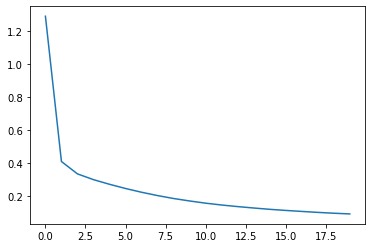

In [ ]:
plt.plot(history)

In [ ]:
y_pred = DN(x_test)
y_hat = torch.argmax(y_pred, axis=1)

In [ ]:
torch.mean((y_test == y_hat).type(torch.float64))

tensor(0.9664, dtype=torch.float64)

In [ ]:
list(DN.named_parameters())

In [ ]:
for name, param in DN.named_parameters():
    print(name)

0.weight
0.bias
2.weight
2.bias
4.weight
4.bias


In [ ]:
type(DN.named_parameters())

generator

In [ ]:
my_relu=torch.nn.ReLU()
my_relu(torch.tensor(3.0))

tensor(3.)

In [32]:
torch.nn.functional.relu_(torch.tensor(3.0))

tensor(3.)

## 4.2. Custom layer

In [ ]:
class my_dn(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.weight1 = torch.nn.Parameter(torch.randn(([784, 64])))
        self.bias1 = torch.nn.Parameter(torch.randn(([64,])))
        self.weight2 = torch.nn.Parameter(torch.randn(([64, 10])))
        self.bias2 = torch.nn.Parameter(torch.randn(([10,])))
        """
        torch.nn.Linear(784, 64),
        torch.nn.ReLU(),
        torch.nn.Linear(64, 10),
        """
    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        x = x@self.weight1 + self.bias1
        x = torch.nn.functional.relu_(x)
        x = x@self.weight2 + self.bias2

        return x

In [ ]:
DN = my_dn()
for name, param in DN.named_parameters():
    print(name)

weight1
bias1
weight2
bias2


In [ ]:
DN = my_dn()
loss_ftn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(DN.parameters(), lr=0.01)
#optimizer = torch.optim.SGD([weight1, bias1, weight2, bias2], lr=0.01)
history = []

In [ ]:
DN.weight1.shape

torch.Size([784, 64])

In [ ]:
x_train[0:1].shape

torch.Size([1, 784])

In [ ]:
DN(x_train[0:1])

tensor([[-31.3720,   3.0655, -45.3459, -18.5711, -79.2205, -10.6632, 107.8061,
         -79.4376,   8.0780, -22.0611]], grad_fn=<AddBackward0>)

In [33]:
epochs=5
history=[]

for epoch in range(epochs):
  running_loss =0
  for xx, yy in trainloader:
    optimizer.zero_grad()
    yhat = DN(xx)
    loss = loss_ftn(yhat, yy)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()*len(xx)
  history.append(running_loss/len(trainloader.dataset))

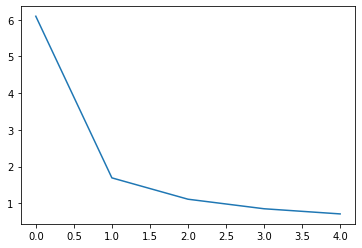

In [ ]:
plt.plot(history)

In [ ]:
y_pred = DN(x_test)
y_hat = torch.argmax(y_pred, axis=1)

In [ ]:
torch.mean((y_test == y_hat).type(torch.float64))

tensor(0.8447, dtype=torch.float64)

In [ ]:
list(DN.named_parameters())

In [ ]:
for name, param in DN.named_parameters():
  print(name)

weight1
bias1
weight2
bias2


In [ ]:
DN.weight1

Parameter containing:
tensor([[ 0.1242,  1.0047,  1.5222,  ...,  0.8632, -1.1364,  0.8145],
        [ 3.0911, -0.1977,  1.6241,  ..., -1.1568,  0.1391,  0.6832],
        [ 0.4073,  0.1000, -0.6148,  ..., -0.8060, -0.3026,  0.0395],
        ...,
        [-0.9159, -0.5120, -0.5187,  ..., -1.1179,  0.1646, -1.1415],
        [-0.1904,  0.6365,  0.4090,  ..., -1.0923, -0.0310, -0.8019],
        [ 1.1473, -0.7217, -0.4854,  ...,  0.7748, -0.2030,  0.8243]],
       requires_grad=True)

### 4.2.1 Using predefined layer in the customed module

In [35]:
class my_dn2(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = torch.nn.Linear(784, 64)
        #self.relu1 = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(64, 10)
    def forward(self, x):
        x = self.linear1(x)
        x = torch.nn.functional.relu_(x)
        #x = self.relu1(x)
        x = self.linear2(x)
        return x

In [36]:
DN2 = my_dn2()
loss_ftn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(DN2.parameters(), lr=0.01)
history = []

In [37]:
for name, param in DN2.named_parameters():
  print(name)

linear1.weight
linear1.bias
linear2.weight
linear2.bias


In [ ]:
DN2.linear1.weight

Parameter containing:
tensor([[ 2.4601e-02, -1.8218e-02,  8.8948e-03,  ..., -1.9684e-02,
         -3.3423e-02, -4.4238e-03],
        [-2.3775e-02, -3.2408e-02,  1.6847e-02,  ...,  7.7463e-03,
         -1.7240e-02,  1.3187e-02],
        [ 1.0420e-02, -1.5150e-02, -1.0186e-02,  ..., -1.7150e-02,
          3.3471e-02, -2.8480e-02],
        ...,
        [-1.9906e-03,  1.3337e-02, -1.4107e-02,  ..., -2.0147e-02,
          9.4649e-04, -9.2577e-03],
        [ 1.7529e-02,  4.2605e-05,  1.4879e-02,  ..., -1.7517e-02,
          2.1439e-02,  1.4017e-02],
        [-1.0709e-02,  1.9853e-02, -2.6121e-02,  ...,  1.7056e-02,
         -2.2371e-02, -2.9770e-02]], requires_grad=True)

In [38]:
epochs=5
history=[]

for epoch in range(epochs):
  running_loss =0
  for xx, yy in trainloader:
    optimizer.zero_grad()
    yhat = DN2(xx)
    loss = loss_ftn(yhat, yy)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()*len(xx)
  history.append(running_loss/len(trainloader.dataset))

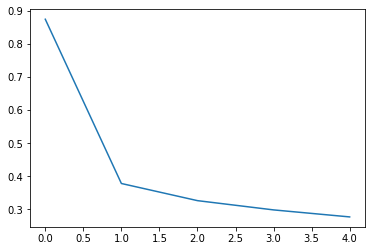

In [ ]:
plt.plot(history)

In [ ]:
y_pred = DN2(x_test)
y_hat = torch.argmax(y_pred, axis=1)

In [ ]:
torch.mean((y_test == y_hat).type(torch.float64))

tensor(0.9265, dtype=torch.float64)

In [ ]:
list(DN2.named_parameters())

In [ ]:
DN2.linear1.weight

Parameter containing:
tensor([[ 0.0307, -0.0219,  0.0136,  ...,  0.0057, -0.0338,  0.0093],
        [-0.0134, -0.0043, -0.0318,  ...,  0.0047, -0.0046, -0.0130],
        [-0.0097,  0.0008, -0.0019,  ..., -0.0318,  0.0333,  0.0324],
        ...,
        [-0.0263,  0.0293, -0.0073,  ..., -0.0161,  0.0047,  0.0127],
        [ 0.0063,  0.0100,  0.0072,  ...,  0.0024,  0.0277,  0.0169],
        [ 0.0118, -0.0250,  0.0307,  ...,  0.0341, -0.0289, -0.0137]],
       requires_grad=True)

### Example 4.2.1.1: 

In the trained `DN2` layer, you want to calculate the test accuracy. The first step would be to use the following 
```
y_pred = DN2(x_test)
```

Replace `y_pred = DN2(x_test)` with python code using `DN2.linear1` and `DN2.linear2`. Then, calculate the test accuracy.

In [39]:
y_pred = DN2(x_test)

In [41]:
xxx = DN2.linear1(x_test)
xxx = torch.nn.functional.relu_(xxx)
xxx = DN2.linear2(xxx)

In [42]:
torch.mean((y_pred-xxx)**2)

tensor(0., grad_fn=<MeanBackward0>)

In [ ]:
# hint:
DN2.linear1(x_test)

tensor([[ 1.4517,  0.8841,  0.4123,  ...,  0.2210,  2.7678,  2.0617],
        [ 1.1518,  1.6016,  2.1960,  ...,  1.9948,  0.8719,  0.3791],
        [ 0.3448,  0.7892,  0.0272,  ...,  0.4873, -0.1401,  0.2913],
        ...,
        [ 2.1613,  1.1073,  1.0320,  ...,  1.8142,  0.6906,  1.4440],
        [ 0.2691,  1.4677,  1.1777,  ...,  2.3147,  0.4936,  0.3533],
        [ 3.9028,  0.4264,  2.2243,  ...,  2.8980,  0.1663,  0.7516]],
       grad_fn=<AddmmBackward0>)

### Example 4.2.1.2: 

In `DN2` layer, replace `self.linear2 = torch.nn.Linear(64, 10)` with user defined weight and bias. Then, repeat the same procedure in Example 4.2.1.1 to calculate the test accuracy.